# Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('churn.csv')

In [13]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure CallService  \
0  2907-ILJBN  Female            0.0     Yes        Yes    11.0         Yes   
1  3896-RCYYE  Female            0.0      No         No    67.0          No   
2  9764-REAFF  Female            0.0     Yes         No    59.0         Yes   
3  6651-RLGGM    Male            0.0     Yes        Yes    67.0         Yes   
4  5879-SESNB  Female            0.0      No         No    11.0         Yes   

  MultipleConnections InternetConnection       OnlineSecurity  ...  \
0                  No                 No  No internet service  ...   
1    No phone service                DSL                   No  ...   
2                  No                 No  No internet service  ...   
3                 Yes                 No  No internet service  ...   
4                 Yes        Fiber optic                   No  ...   

  DeviceProtectionService        TechnicalHelp             OnlineTV  \
0     No internet service  No internet service  No internet service   
1                     Yes                  Yes                  Yes   
2     No internet service  No internet service  No internet service   
3     No internet service  No internet service  No internet service   
4                      No                   No                   No   

          OnlineMovies       Agreement BillingMethod  \
0  No internet service        One year            No   
1                  Yes  Month-to-month           Yes   
2  No internet service        Two year            No   
3  No internet service        Two year            No   
4                   No  Month-to-month            No   

               PaymentMethod MonthlyServiceCharges  TotalAmount  Churn  
0               Mailed check                 20.60       233.90     No  
1    Credit card (automatic)                 53.40      3579.15     No  
2  Bank transfer (automatic)                 18.40      1057.85     No  
3               Mailed check                 26.30      1688.90     No  
4           Electronic check                 75.25       888.65     No  

[5 rows x 21 columns]

In [14]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents     tenure  \
12330  6894-LFHLY    Male       0.357423      No        Yes   2.927730   
12331  0639-TSIQW  Female       0.000000      No         No  63.430477   
12332  0639-TSIQW    Male       0.000000      No        Yes  49.677352   
12333  0607-DAAHE    Male       0.660002     Yes        Yes  20.659911   
12334  1038-ZAGBI  Female       0.433856     Yes         No   8.529156   

      CallService MultipleConnections InternetConnection       OnlineSecurity  \
12330         Yes                  No        Fiber optic                   No   
12331          No    No phone service        Fiber optic                  Yes   
12332          No    No phone service        Fiber optic                  Yes   
12333         Yes                  No                 No  No internet service   
12334         Yes                  No        Fiber optic  No internet service   

       ... DeviceProtectionService        TechnicalHelp             OnlineTV  \
12330  ...                      No                   No  No internet service   
12331  ...                     Yes                   No                   No   
12332  ...                     Yes                   No                   No   
12333  ...                      No  No internet service  No internet service   
12334  ...     No internet service  No internet service                   No   

              OnlineMovies       Agreement BillingMethod  \
12330  No internet service  Month-to-month           Yes   
12331                   No  Month-to-month            No   
12332                   No  Month-to-month            No   
12333  No internet service  Month-to-month           Yes   
12334  No internet service        One year           Yes   

                 PaymentMethod MonthlyServiceCharges  TotalAmount  Churn  
12330             Mailed check             40.151251    76.135546    Yes  
12331  Credit card (automatic)             96.252187  6310.292602    Yes  
12332  Credit card (automatic)             70.445975  4091.168541    Yes  
12333             Mailed check             55.819099   560.153643    Yes  
12334             Mailed check             43.488511   263.006875    Yes  

[5 rows x 21 columns]

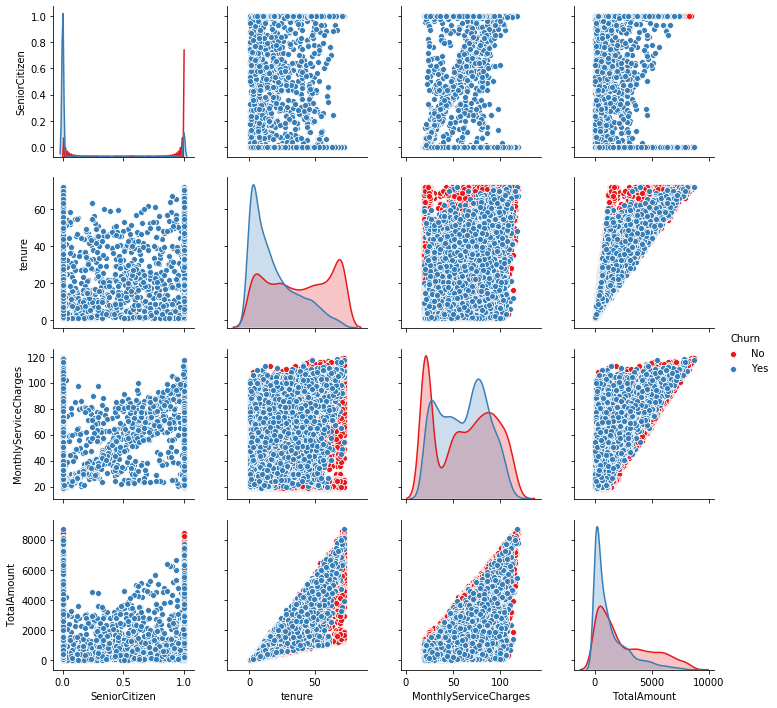

In [15]:
sns.pairplot(df,hue='Churn',palette='Set1')

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'CallService', 'MultipleConnections',
       'InternetConnection', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtectionService', 'TechnicalHelp', 'OnlineTV',
       'OnlineMovies', 'Agreement', 'BillingMethod', 'PaymentMethod',
       'MonthlyServiceCharges', 'TotalAmount', 'Churn'], dtype=object)

In [17]:
# Checking the data types of all the columns
df.dtypes

customerID                  object
gender                      object
SeniorCitizen              float64
Partner                     object
Dependents                  object
tenure                     float64
CallService                 object
MultipleConnections         object
InternetConnection          object
OnlineSecurity              object
OnlineBackup                object
DeviceProtectionService     object
TechnicalHelp               object
OnlineTV                    object
OnlineMovies                object
Agreement                   object
BillingMethod               object
PaymentMethod               object
MonthlyServiceCharges      float64
TotalAmount                float64
Churn                       object
dtype: object

In [19]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalAmount, errors='coerce')
df.isnull().sum()

C:\Users\mrspider\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [20]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df1 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df1)
df_dummies.head()

SeniorCitizen  tenure  MonthlyServiceCharges  TotalAmount  Churn  \
0            0.0    11.0                  20.60       233.90      0   
1            0.0    67.0                  53.40      3579.15      0   
2            0.0    59.0                  18.40      1057.85      0   
3            0.0    67.0                  26.30      1688.90      0   
4            0.0    11.0                  75.25       888.65      0   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              0  ...   
1              1            0           1            0              1  ...   
2              1            0           0            1              1  ...   
3              0            1           0            1              0  ...   
4              1            0           1            0              1  ...   

   OnlineMovies_Yes  Agreement_Month-to-month  Agreement_One year  \
0                 0                         0                   1   
1                 1                         1                   0   
2                 0                         0                   0   
3                 0                         0                   0   
4                 0                         1                   0   

   Agreement_Two year  BillingMethod_No  BillingMethod_Yes  \
0                   0                 1                  0   
1                   0                 0                  1   
2                   1                 1                  0   
3                   1                 1                  0   
4                   0                 1                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           1  
1                           0  
2                           0  
3                           1  
4                           0  

[5 rows x 46 columns]

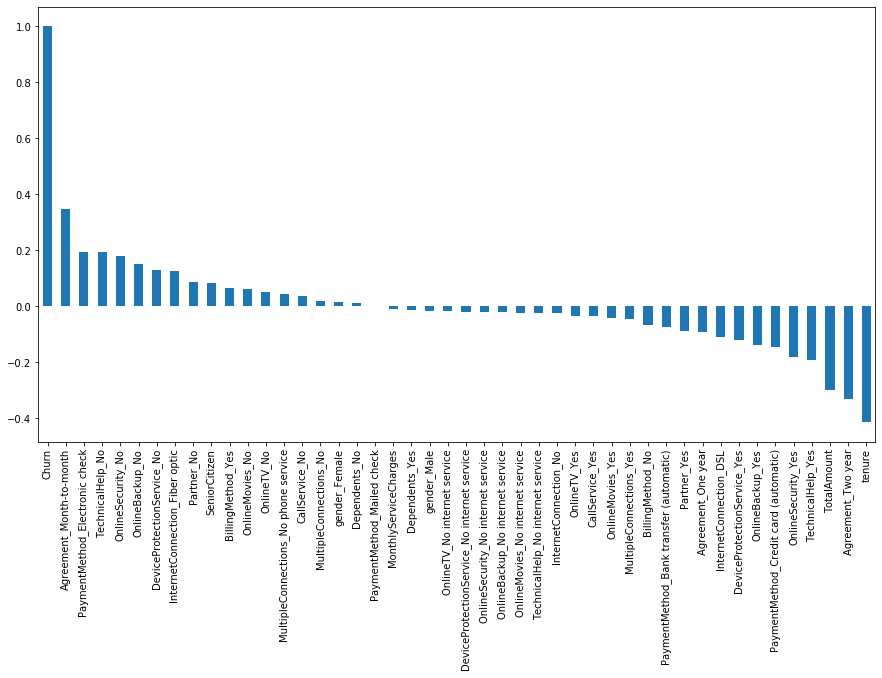

In [21]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree = DecisionTreeClassifier()

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Prediction and Evaluation 

Let's evaluate our decision tree.

In [40]:
predictions = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2041
           1       0.86      0.77      0.81      1660

    accuracy                           0.84      3701
   macro avg       0.84      0.83      0.84      3701
weighted avg       0.84      0.84      0.84      3701



# Tree Visualization

In [49]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_dummies.columns[:-1])
features

['SeniorCitizen',
 'tenure',
 'MonthlyServiceCharges',
 'TotalAmount',
 'Churn',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'CallService_No',
 'CallService_Yes',
 'MultipleConnections_No',
 'MultipleConnections_No phone service',
 'MultipleConnections_Yes',
 'InternetConnection_DSL',
 'InternetConnection_Fiber optic',
 'InternetConnection_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtectionService_No',
 'DeviceProtectionService_No internet service',
 'DeviceProtectionService_Yes',
 'TechnicalHelp_No',
 'TechnicalHelp_No internet service',
 'TechnicalHelp_Yes',
 'OnlineTV_No',
 'OnlineTV_No internet service',
 'OnlineTV_Yes',
 'OnlineMovies_No',
 'OnlineMovies_No internet service',
 'OnlineMovies_Yes',
 'Agreement_Month-to-month',
 'Agreement_One year',
 'Agreement_Two year',
 'BillingMethod_No',


In [50]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rfc_pred = rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,rfc_pred))

[[1907  134]
 [ 328 1332]]


In [54]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2041
           1       0.91      0.80      0.85      1660

    accuracy                           0.88      3701
   macro avg       0.88      0.87      0.87      3701
weighted avg       0.88      0.88      0.87      3701

